## Fitting Lognormal distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import lognorm
from scipy import optimize

%matplotlib inline

In [2]:
# Crack depth data
df = pd.DataFrame({'percentile': [0.01, 0.25, 0.5, 0.75, 0.99],
                   'lognorm_sample': [20.0, 35.0, 60.0, 75.0, 100.0]},
                  index = None)
print(df)

   percentile  lognorm_sample
0        0.01            20.0
1        0.25            35.0
2        0.50            60.0
3        0.75            75.0
4        0.99           100.0


In [3]:
x = df['percentile']
y = df['lognorm_sample']

### Fitting parameters by least square method

In [4]:
# Return ppf value from percentile
def lognorm_ppf(parameter, x) :
    shape = parameter[0]
    scale = parameter[1]
    loc   = parameter[2]
    
    lognorm_ppf = lognorm.ppf(x, shape, loc, scale)
    
    return lognorm_ppf

In [5]:
# Residual
def fit_curve(parameter, x, y):
    residual = y - lognorm_ppf(parameter, x)
    return residual

In [6]:
# Fitting with original values
parameter_init = [1.0, 1.0, 1.0]
result = optimize.leastsq(fit_curve, parameter_init, args = (x, y))

print(result)
print('result = ', result)
shape = result[0][0]
scale = result[0][1]
loc   = result[0][2]
                  
print('shape =  {:.4}'.format(shape))
print('loc   =  {:.4}'.format(loc))
print('scale =  {:.4}'.format(scale))

(array([ 5.91394448e-02,  3.06222004e+02, -2.49480526e+02]), 1)
result =  (array([ 5.91394448e-02,  3.06222004e+02, -2.49480526e+02]), 1)
shape =  0.05914
loc   =  -249.5
scale =  306.2


In [7]:
# Fitting with original values
parameter_init = [1.0, 1.0, 1.0]
result = optimize.least_squares(fit_curve, parameter_init, args = (x, y))

print(result)
shape = result.x[0]
scale = result.x[1]
loc   = result.x[2]
                  
print('shape =  {:.4}'.format(shape))
print('loc   =  {:.4}'.format(loc))
print('scale =  {:.4}'.format(scale))

 active_mask: array([0., 0., 0.])
        cost: 75.05404131627691
         fun: array([ 2.61853734, -9.76697998,  3.2585681 ,  5.79679521, -1.90692062])
        grad: array([-2.26503282e-03, -1.98069747e-07, -5.51205233e-08])
         jac: array([[ 620.78764343,   -0.87146117,   -1.        ],
       [ 198.45933914,   -0.96089473,   -1.        ],
       [   0.        ,   -1.        ,   -1.        ],
       [-214.94132233,   -1.04069672,   -1.        ],
       [-817.42329025,   -1.14749807,   -1.        ]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 34
        njev: 28
  optimality: 0.002265032818513646
      status: 2
     success: True
           x: array([ 5.91416194e-02,  3.06210711e+02, -2.49469279e+02])
shape =  0.05914
loc   =  -249.5
scale =  306.2


In [8]:
# Fitting with original values
parameter_init = [1.0, 1.0, 1.0]
result = optimize.least_squares(fit_curve, parameter_init, args = (x, y))

print(result)
shape = result.x[0]
scale = result.x[1]
loc   = result.x[2]
                  
print('shape =  {:.4}'.format(shape))
print('loc   =  {:.4}'.format(loc))
print('scale =  {:.4}'.format(scale))

 active_mask: array([0., 0., 0.])
        cost: 75.05404131627691
         fun: array([ 2.61853734, -9.76697998,  3.2585681 ,  5.79679521, -1.90692062])
        grad: array([-2.26503282e-03, -1.98069747e-07, -5.51205233e-08])
         jac: array([[ 620.78764343,   -0.87146117,   -1.        ],
       [ 198.45933914,   -0.96089473,   -1.        ],
       [   0.        ,   -1.        ,   -1.        ],
       [-214.94132233,   -1.04069672,   -1.        ],
       [-817.42329025,   -1.14749807,   -1.        ]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 34
        njev: 28
  optimality: 0.002265032818513646
      status: 2
     success: True
           x: array([ 5.91416194e-02,  3.06210711e+02, -2.49469279e+02])
shape =  0.05914
loc   =  -249.5
scale =  306.2


### Draw distrubution

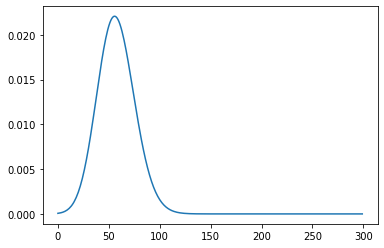

In [9]:
xx = np.arange(0, 300, 1)

plt.plot(xx, lognorm.pdf(xx, shape, loc, scale))
plt.show()

In [10]:
# Check
parameter_v = [shape, scale, loc]
print(lognorm_ppf(parameter_v, 0.01))
print(lognorm_ppf(parameter_v, 0.25))
print(lognorm_ppf(parameter_v, 0.5))
print(lognorm_ppf(parameter_v, 0.75))
print(lognorm_ppf(parameter_v, 0.99))

17.381462657260982
44.76697997517542
56.74143189971298
69.20320479327913
101.90692061945097


### Compare crack depth distribution

In [11]:
df = pd.read_csv('lognorm_sample_data.csv')
print(df.shape)
df.head()

(5, 4)


,percentile,sample_a,sample_b,sample_c
0,0.01,10,5,5
1,0.25,20,10,20
2,0.50,30,20,30
3,0.75,40,40,50
4,0.99,50,60,100


In [12]:
x = df['percentile']
y_a = df['sample_a']
y_b = df['sample_b']
y_c = df['sample_c']

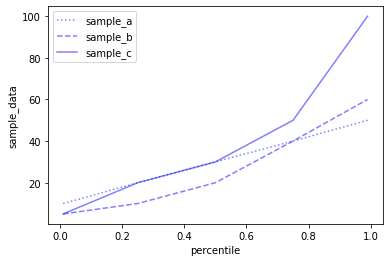

In [13]:
# Draw graph
plt.plot(x, y_a, 'b:',  alpha=0.5, label = 'sample_a')
plt.plot(x, y_b, 'b--', alpha=0.5, label = 'sample_b')
plt.plot(x, y_c, 'b-',  alpha=0.5, label = 'sample_c')
plt.legend(loc = 'best')
plt.xlabel('percentile')
plt.ylabel('sample_data')
plt.show()

In [14]:
def make_params(x, y):
    parameter_init = [1.0, 1.0, 1.0]
    result = optimize.leastsq(fit_curve, parameter_init, args = (x, y))

    shape = result[0][0]
    scale = result[0][1]
    loc   = result[0][2]
    
    return shape, scale, loc

In [15]:
shape_a, scale_a, loc_a = make_params(x, y_a)
shape_b, scale_b, loc_b = make_params(x, y_b)
shape_c, scale_c, loc_c = make_params(x, y_c)

C:\Users\mmm\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


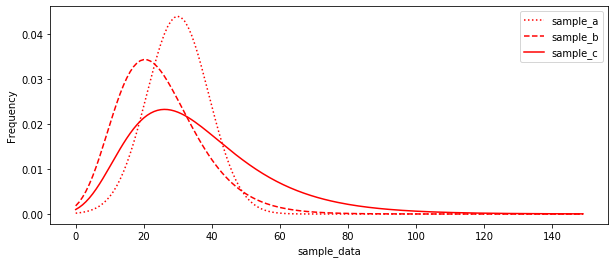

In [16]:
xx = np.arange(0, 150, 1)

plt.figure(figsize=(10.0, 4.0))

plt.plot(xx, lognorm.pdf(xx, shape_a,  loc_a,  scale_a),  'r:',  label = 'sample_a')
plt.plot(xx, lognorm.pdf(xx, shape_b,  loc_b,  scale_b),  'r--',  label = 'sample_b')
plt.plot(xx, lognorm.pdf(xx, shape_c,  loc_c,  scale_c),  'r-',  label = 'sample_c')
plt.xlabel('sample_data')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.show()